## Observations and Insights 

Regarding analysis of this data, it should be noted that:

1. The gender distribution of subjects is nearly half and half, with males comprising 50.4% and females comprising 49.6%. These researchers took care in selecting subjects for an even gender distribution.

2. There is a strong positive correlation between subject weight and average tumor volume in subjects treated with capomulin, with a correlation coefficient of 0.84. This means the higher the weight of subjects treated with capomulin, the more likely they are to have greater tumor volumes. 

3. Out of the drugs tested, Ramicane appears to perform just as well as Capomulin in reducing tumor size. In this study, Capomulin and Ramicane appear to be the most promising drugs for the reduction of tumor volume. These two drugs show the lowest average and median tumor size among any treated subjects. Additionally, the final tumor volume in subjects treated with these drugs is the lowest among any treated subjects, with the volumes being very similar between the two drugs. Compared to other drugs used, the most measurements overall were taken in subjects given these two drugs. According to the IQR method of detection, there are no outliers among the measurements of final tumor volume for either of these drugs.

In [155]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Create dfs for both data files
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

# Combine the data into a single dataset with study results listed first, then mouse metadata. 
#This combines all data from each set, with no preference for one dataset vs the other
merged_df = pd.merge(study_results_df, mouse_metadata_df, on="Mouse ID", how="outer")

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [156]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()


249

In [157]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint:
#find duplicated rows for Mouse ID and Timepoint first
duplicates = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]

#Locate the unique mouse ID from the duplicated data and display it
duplicate_mouse = duplicates.loc[:,"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [158]:
# Optional: Get all the data for the duplicate mouse ID.

#Locate all rows of data for the duplicated mouse by its ID number
g989_df = merged_df.loc[(merged_df["Mouse ID"]=="g989")]

#Display the data
g989_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [159]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_names = merged_df[merged_df['Mouse ID'] == "g989" ].index
merged_df.drop(index_names, inplace = True)

#Display the cleaned df
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [160]:
# Checking the number of mice in the clean DataFrame.
merged_df["Mouse ID"].nunique()


248

## Summary Statistics

In [191]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
group_treatments = merged_df.groupby("Drug Regimen")


#Set a variable for tumor column for ease of function set up
tumor = group_treatments["Tumor Volume (mm3)"]

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = tumor.mean()
median_tumor = tumor.median()
variance_tumor = tumor.var()
stdev_tumor = tumor.std()
sem_tumor = tumor.sem()

# Assemble the resulting series into a single summary dataframe.
tumor_volume_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean_tumor, "Median Tumor Volume (mm3)":
                               median_tumor, "Variance":variance_tumor, "Standard Deviation":stdev_tumor, "SEM":sem_tumor})

#Display the summary df
tumor_volume_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [192]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_tumor = tumor.agg(["mean", "median", "var", "std", "sem"])

#Display the summary table
summary_stats_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

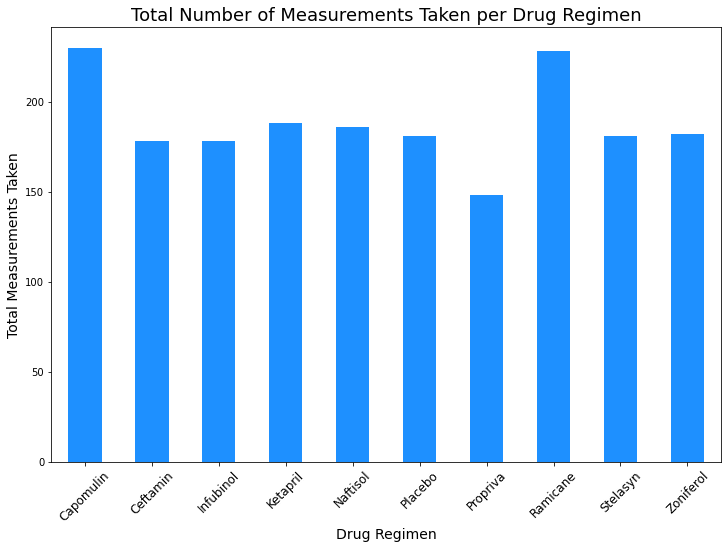

In [163]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
treatment_count = group_treatments["Tumor Volume (mm3)"].count()


#Plot the bar chart with title
treatment_count.plot(kind = "bar", color = "dodgerblue", figsize = (12,8))



#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Number of Measurements Taken per Drug Regimen", fontsize = (18))
plt.ylabel("Total Measurements Taken", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))
plt.xlabel("Drug Regimen", fontsize = (14))

#Display the chart
plt.show()


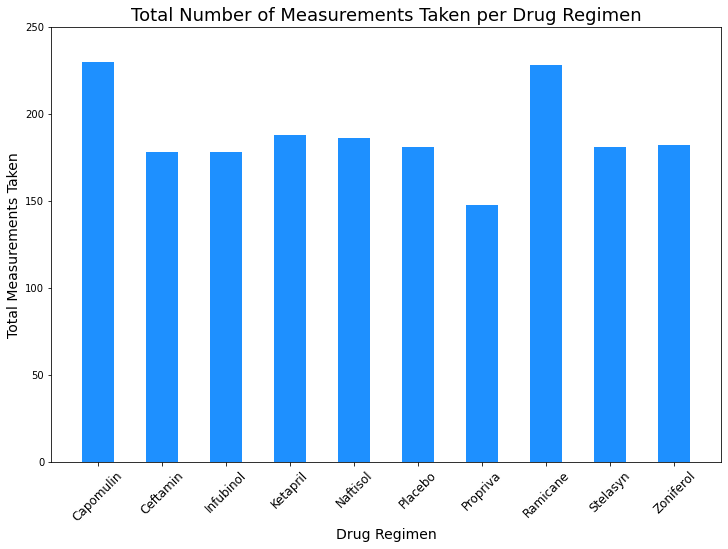

In [164]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Use groupby data from previous cell to get counts of measurements and names of drugs into arrays
number_treatments = treatment_count.values
drug_names = treatment_count.index.values

#Plot data into bar graph

#Set the size of the figure
plt.figure(figsize=(12,8))

#Set the chart type as bar, x-axis is the number of drug names, y is the number of treatments, set color and width of bars
plt.bar(drug_names, number_treatments, color = 'dodgerblue', align='center', width=0.5)

#Set the y axis limits
plt.ylim(0,250)

#Set placement of x-axis headers and
plt.xticks(tick_locations, drug_names, rotation = 45, fontsize = (12))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Number of Measurements Taken per Drug Regimen", fontsize = (18))
plt.ylabel("Total Measurements Taken", fontsize = (14))
plt.xlabel("Drug Regimen", fontsize = (14))

#Display the chart
plt.show()



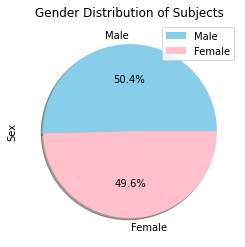

In [165]:

#Generate a pie plot showing the distribution of female versus male mice using pandas

#Groupby unique mouse ID and Sex with count function to display
gender = merged_df.groupby(["Mouse ID", "Sex"]).count()

#Reset the indext to access "Sex" Column
gender_index_reset =gender.reset_index()

#Count the number of males and females 
gender_dist = gender_index_reset["Sex"].value_counts()

#Convert grouby object to df to plot with pandas
gender_dist_df = pd.DataFrame(gender_dist)
gender_dist_df

#Set the chart type as pie, include percentages on the chart, add the labels and change the colors
gender_dist_df.plot(kind = "pie", y='Sex', shadow = True, autopct='%1.1f%%',
                                   title = "Gender Distribution of Subjects", colors=["skyblue", "pink"])
#Display the chart
plt.show()


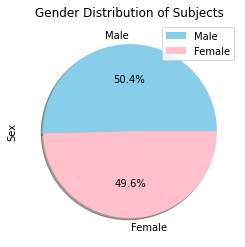

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Only pull male mouse entries
males_df = merged_df.loc[merged_df["Sex"] == "Male", :]

#Count the number of males using the unique Mouse ID
total_males = len(males_df["Mouse ID"].unique())
total_males

#Only pull female mice
females_df = merged_df.loc[merged_df["Sex"] == "Female", :]

#Count the number of females using the unique Mouse ID
total_females = len(females_df["Mouse ID"].unique())

#Plot the pie chart with title

#Set variables for the labels
sex = ["Male", "Female"]
numbers = [total_males, total_females]

#Set the chart type as pie, include percentages on the chart, add the labels and change the colors
plt.pie(numbers, labels = sex, autopct="%1.1f%%", shadow = True, colors=["skyblue", "pink"])

#Include a legend
plt.legend(sex)

#Set the title and y label
plt.title("Gender Distribution of Subjects")
plt.ylabel("Sex")

#Display the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merged_df.groupby("Mouse ID").max()["Timepoint"]

#Convert it to a dataframe
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merged_df = pd.merge(last_timepoint, merged_df,  on=("Mouse ID", "Timepoint"), how="inner")


In [168]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

#Set up loop through each of the four desired drugs to pull
for drug in drug_regimen:
    
        # Locate the rows which contain mice on each drug and get the tumor volumes
        tumor_volume = timepoint_merged_df.loc[timepoint_merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
        
        #Append to the empty list: this should eventually give a list of 4 lists
        tumor_volume_data.append(tumor_volume)
       
        #Determine outliers using upper and lower bounds
        quartiles = tumor_volume.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        
        #Display any outliers
        print(drug, outliers)


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


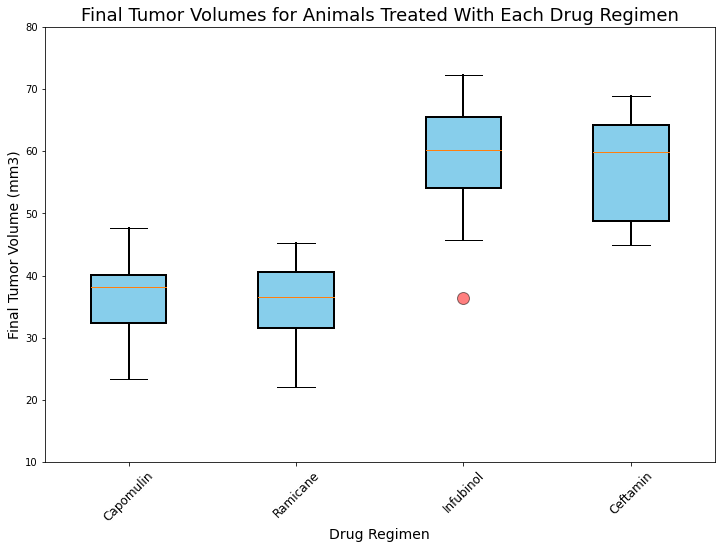

In [169]:
#Set the size of the plot
plt.figure(figsize =(12, 8))

#Set up a variable to define outlier markers
red_circle = dict(marker = 'o', markerfacecolor = 'red', alpha = 0.5, markersize = 12)

#Plot the data from the 4 drugs into a boxplot with each drug as a label on the tick marks
bp = plt.boxplot(tumor_volume_data, labels = drug_regimen, flierprops = red_circle, patch_artist = True)

#Change color and outline in boxes
for box in bp['boxes']:
    # change outline color
    box.set( color = "black", linewidth=2)
    # change fill color
    box.set( facecolor = 'skyblue')
    
#Change line width of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)

#Set title and axis labels and font size
plt.title("Final Tumor Volumes for Animals Treated With Each Drug Regimen", fontsize = (18))
plt.ylabel("Final Tumor Volume (mm3)", fontsize = (14))
plt.xlabel("Drug Regimen", fontsize = (14))

#Set the limits of y axis
plt.ylim(10,80)

#Set parameters for the tick labels
plt.xticks(size = 12, rotation = 45)

#Display the chart
plt.show()



## Line and Scatter Plots

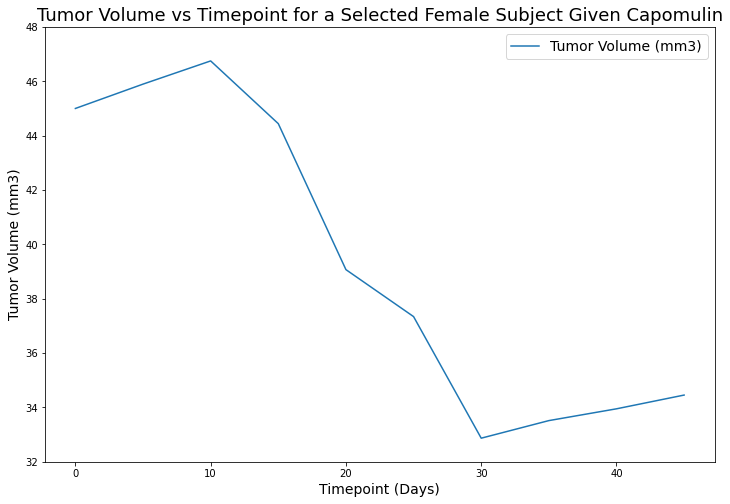

In [170]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_df = merged_df.loc[(merged_df["Mouse ID"]== "t565")]

#Plot a line plot of the desired variables and format accordingly - change title font in this step??
capomulin_mouse_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)",
                        figsize = (12,8), title="Tumor Volume vs Timepoint for a Selected Female Subject Given Capomulin")

#Set the x and y labels and font sizes
plt.ylabel("Tumor Volume (mm3)", fontsize = 14)
plt.xlabel("Timepoint (Days)", fontsize = 14)
plt.title("Tumor Volume vs Timepoint for a Selected Female Subject Given Capomulin", fontsize = 18)

#Set y limits
plt.ylim(32,48)

#Adjust the size of the legend and allow it to choose the best location for it on the chart
plt.legend(loc = "best", prop={"size": 14})

#Display the chart
plt.show()


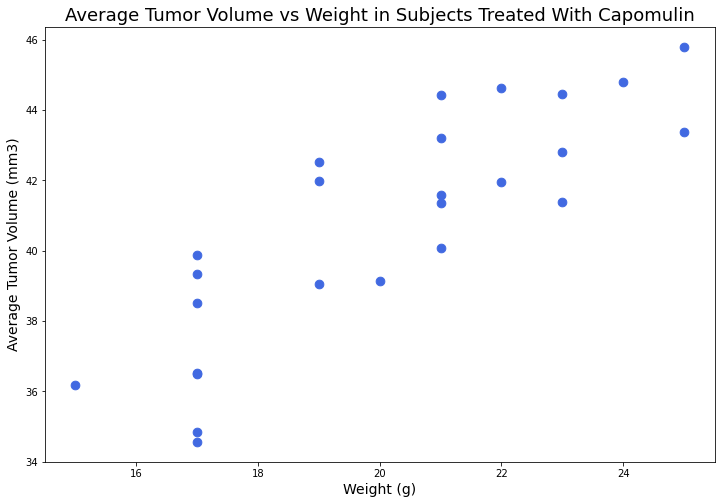

In [177]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Select data for animals treated with capomulin
capomulin_df = merged_df.loc[(merged_df["Drug Regimen"]== "Capomulin")]

#Calculate the mean of the tumor volume (and, consequently, weight, but the weight remains constant per animal anyway)
avg_tumor_vol = capomulin_df.groupby(["Mouse ID"]).mean()

#Plot data as a scatter plot, set x and y axis, size of the dots, size of the figure and the color
avg_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=(75), figsize = (12,8), color = 'royalblue')

#Give titles to each axis and main plot with font settings
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.xlabel("Weight (g)", fontsize = 14)
plt.title("Average Tumor Volume vs Weight in Subjects Treated With Capomulin", fontsize = 18)


#Display the plot
plt.show()


## Correlation and Regression

The correlation between tumor volume and weight is 0.84


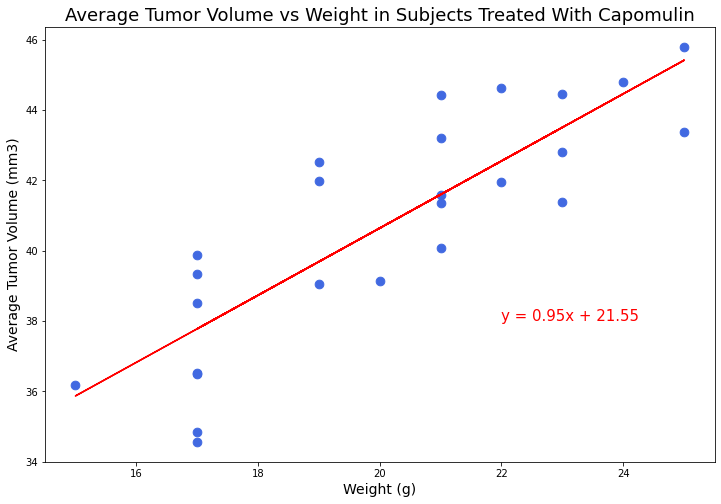

In [187]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate the correlation and display
correlation = st.pearsonr(avg_tumor_vol["Tumor Volume (mm3)"], avg_tumor_vol["Weight (g)"])
print(f"The correlation between tumor volume and weight is {round(correlation[0],2)}")

#Calculate the linear regression
x_values = avg_tumor_vol["Weight (g)"]
y_values = avg_tumor_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Set a variable to hold the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data as a scatter plot, set x and y axis, size of the dots, size of the figure and the color
avg_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=(75), figsize = (12,8), color = 'royalblue')

#Give titles to each axis and main plot with font changes
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.xlabel("Weight (g)", fontsize = 14)
plt.title("Average Tumor Volume vs Weight in Subjects Treated With Capomulin", fontsize = 18)

#Add the line to the plot
plt.plot(x_values, regress_values, "red")

#Add the equation to the plot
plt.annotate(line_eq,(22,38),fontsize=15,color="red")

#Display the chart
plt.show()


